In [3]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *

In [4]:
# paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runs.xlsx', 
#                'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testT_runs.xlsx']

# paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runs.xlsx', 
#                      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testT_runs.xlsx']


In [5]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runsout.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testT_runsout.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runsout.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testT_runsout.xlsx']

In [6]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [13]:
df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


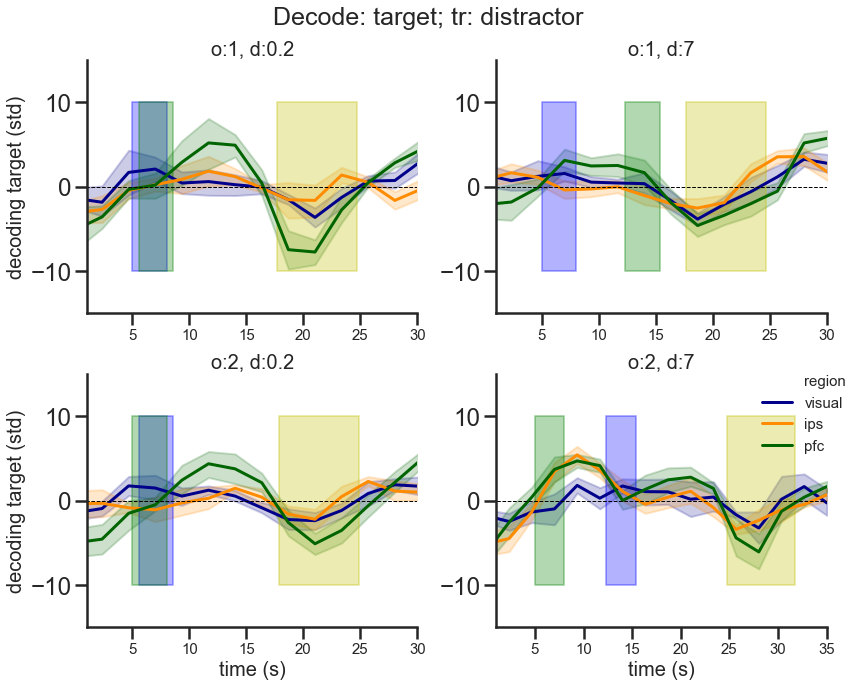

In [14]:
df_x = df_time_target.loc[df_time_target['training_item']=='distractor']
tiemcourse(df_x , 'Decode: target; tr: distractor', ylims=[-15,15])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


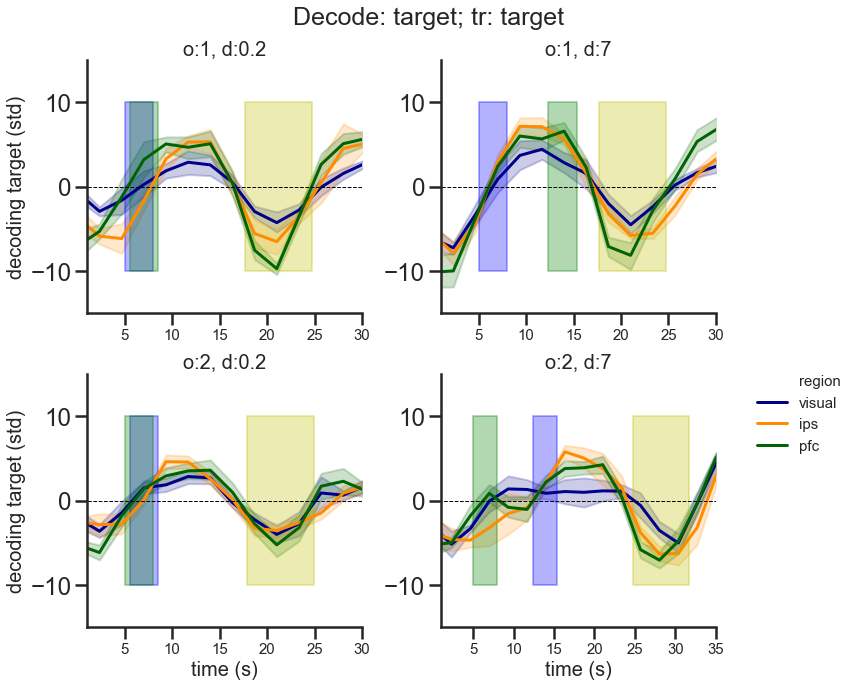

In [16]:
df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse(df_x , 'Decode: target; tr: target', ylims=[-15,15])

### What is wrong with the Cross-validated condition??
##### is it with the decoding data?
##### is it with the shuffle?
##### normal or aberrant data values for them?

In [ ]:
### Apparebtly the suffles look normal

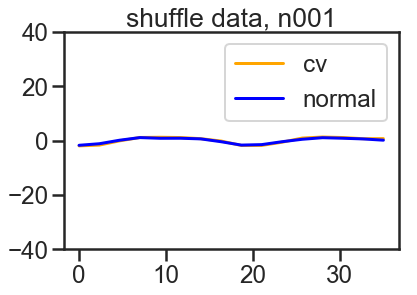

In [14]:
cross_val=[]
normal=[]
for t in df.times.unique(): 
    a = df_shuff.loc[(df_shuff['region']=='pfc') & (df_shuff['times']== t) & 
                               ( df_shuff['condition']=='1_7') & (df_shuff['subject']=='n001') &  
                               ( df_shuff['training_item']=='target')  & 
                               ( df_shuff['decoding_item']== 'target') ].decoding.mean()
    b = df_shuff.loc[(df_shuff['region']=='pfc') & (df_shuff['times']== t) & 
                           ( df_shuff['condition']=='1_0.2') & (df_shuff['subject']=='n001') &  
                           ( df_shuff['training_item']=='target')  & 
                           ( df_shuff['decoding_item']== 'target') ].decoding.mean()
    cross_val.append(a)
    normal.append(b)

    
##
plt.title('shuffle data, n001')
plt.plot( df.times.unique(), np.array(cross_val), color='orange', label='cv')
plt.plot( df.times.unique(), np.array(normal), color='blue', label='normal')
plt.ylim(-40,40)
plt.legend()

    

In [ ]:
## it is in the signal data

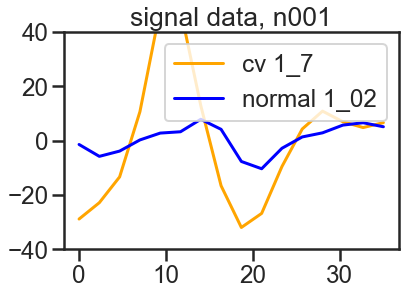

In [16]:
cross_val=[]
normal=[]
for t in df.times.unique(): 
    a = df.loc[(df['region']=='pfc') & (df['times']== t) & 
                               ( df['condition']=='1_7') & (df['subject']=='n001') &  
                               ( df['training_item']=='target')  & 
                               ( df['decoding_item']== 'target') ].decoding.mean()
    b = df.loc[(df['region']=='pfc') & (df['times']== t) & 
                           ( df['condition']=='1_0.2') & (df['subject']=='n001') &  
                           ( df['training_item']=='target')  & 
                           ( df['decoding_item']== 'target') ].decoding.mean()
    cross_val.append(a)
    normal.append(b)

    
##
plt.title('signal data, n001')
plt.plot( df.times.unique(), np.array(cross_val), color='orange', label='cv 1_7')
plt.plot( df.times.unique(), np.array(normal), color='blue', label='normal 1_02')
plt.ylim(-40,40)
plt.legend()



In [17]:
for t in df.times.unique(): 
    a = df.loc[(df['region']=='pfc') & (df['times']== t) & 
                           ( df['condition']=='1_7') & (df['subject']=='n001') &  
                           ( df['training_item']=='target') & 
                           ( df['decoding_item']== 'target')].decoding.mean()
    print(t, a)

0.0 -28.87080954721763
2.335 -22.84973731850501
4.67 -13.36036773165371
7.005 10.61983346315454
9.34 48.28060244659859
11.675 48.27965743095309
14.01 12.87505854342589
16.345 -16.61783426839641
18.68 -31.96728560746692
21.015 -26.7862315371748
23.35 -9.544996084561138
25.685 4.265375656634317
28.02 10.83436571452178
30.355 6.947013649313766
32.69 4.784443312379555
35.025 6.600944130120976


In [2]:
## check the codes for the cv in this, compare with what you did before to solve it.
### some stuff changed! (delete and move the place for the index selection. Esto último da igual, pero lo del delete sí puede afectar)
##results (all in the same cell). To get the previous results you will have to run all again, beacause here I am redifining

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


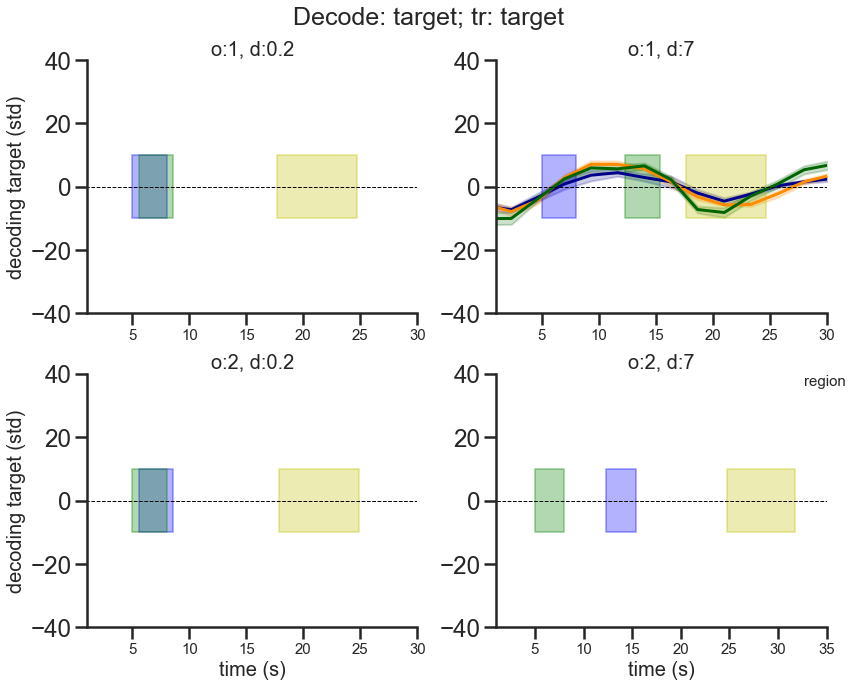

In [14]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runs_solve1_7.xlsx']
paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runs_solve1_7.xlsx']

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])


#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse(df_x , 'Decode: target; tr: target', ylims=[-40,40])


In [ ]:
### Check the high error

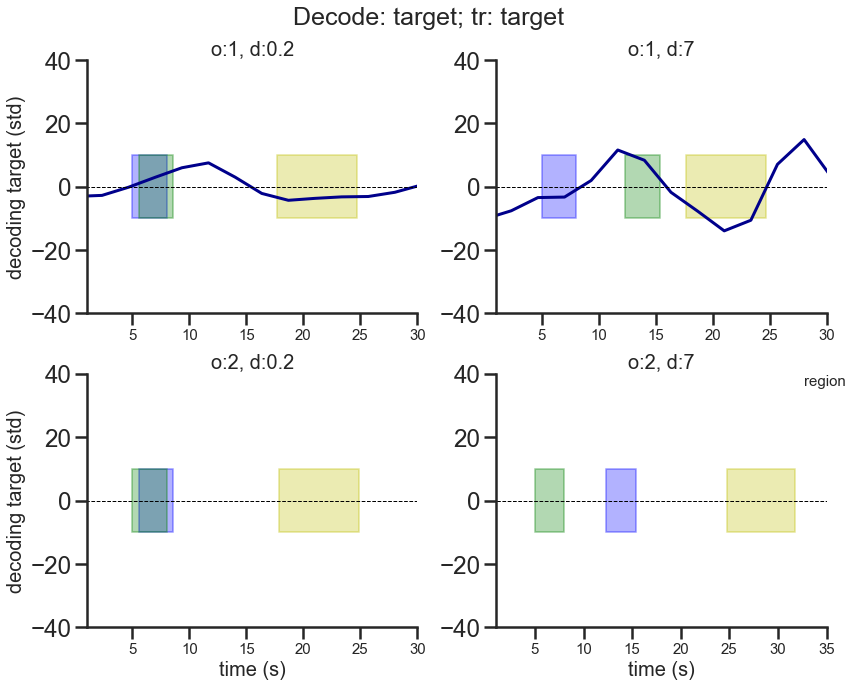

In [3]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runs_high.xlsx']
paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runs_high.xlsx']

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])


#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2', '1_7']:
    for reg in ['visual']:
        for subj in ['n001']:
            for training_item in ['target']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse(df_x , 'Decode: target; tr: target', ylims=[-40,40])
